In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow import keras
from tensorflow.keras.layers import Dense,LSTM,Dropout,GRU,Bidirectional
from sklearn import preprocessing, svm
sns.set()

In [2]:
df = pd.read_csv('train-data.csv')
# test_data = pd.read_csv('test-data.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
df.shape

(6019, 13)

# Kilometer Driven

In [9]:
df['Kilometers_Driven'].value_counts()

Kilometers_Driven
60000    82
45000    70
65000    68
50000    61
55000    60
         ..
28937     1
82085     1
68465     1
63854     1
27365     1
Name: count, Length: 3093, dtype: int64

In [10]:
#looking at unique values
print(df['Location'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner_Type'].unique())

#Rest Feature are worked for Feature Engineering

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [11]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

# Dropping the columns which contains Null Values

In [12]:
print("Shape of train data Before dropping any Row: ",df.shape)
df = df[df['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",df.shape)
df = df[df['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",df.shape)
df = df[df['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",df.shape)
df = df[df['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",df.shape)

Shape of train data Before dropping any Row:  (6019, 13)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 13)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 13)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 13)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 13)


#### Total Rows remains are 5975 from 6019. Dropped rows are 44

In [13]:
df = df.reset_index(drop=True)

In [14]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [15]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Feautre Engineering 🛠
There are many different data which could be extarcted from present. And, that's where Feature Engineering comes.

In [16]:
for i in range(df.shape[0]):
    df.at[i, 'Company'] = df['Name'][i].split()[0]
    df.at[i, 'Mileage(km/kg)'] = df['Mileage'][i].split()[0]
    df.at[i, 'Engine(CC)'] = df['Engine'][i].split()[0]
    df.at[i, 'Power(bhp)'] = df['Power'][i].split()[0]

In [17]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.6,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.2,1199,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.2,1968,140.8


In [18]:
df['Mileage(km/kg)'] = df['Mileage(km/kg)'].astype(float)
df['Engine(CC)'] = df['Engine(CC)'].astype(float)

At this point when I tried to change **Power(bhp)** to float an error occured (Can't convert str to float : null).
So, I started investigating. And found some cell where having values: 'null bhp'

In [19]:
df['Power'][76]

'null bhp'

Then I found the indexes of these values and removed them.

In [20]:
x = 'n'
count = 0
position = []
for i in range(df.shape[0]):
    if df['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [21]:
df = df.drop(df.index[position])
df = df.reset_index(drop=True)

Now the new shape of training data is:

In [22]:
df.shape

(5872, 17)

In [23]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.8


In [24]:
df['Power(bhp)'] = df['Power(bhp)'].astype(float)

In [25]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80


In [26]:
for i in range(df.shape[0]):
    if pd.isnull(df.loc[i,'New_Price']) == False:
        df.at[i,'New_car_Price'] = df['New_Price'][i].split()[0]

In [27]:
df.drop(columns=['New_car_Price'],inplace = True)

Now,

Let's delete all useless featiures.

In [28]:
df.drop(["Name"],axis=1,inplace=True)
df.drop(["Mileage"],axis=1,inplace=True)
df.drop(["Engine"],axis=1,inplace=True)
df.drop(["Power"],axis=1,inplace=True)
df.drop(["New_Price"],axis=1,inplace=True)

# Data Visualization
## Plotting some graphs and finding the data insights

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 550.6+ KB


In [30]:
df['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

### Price

First let's have a look over our target column

C:\Users\vedpr\AppData\Local\Temp\ipykernel_132\3685522468.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


(0.0, 160.0)

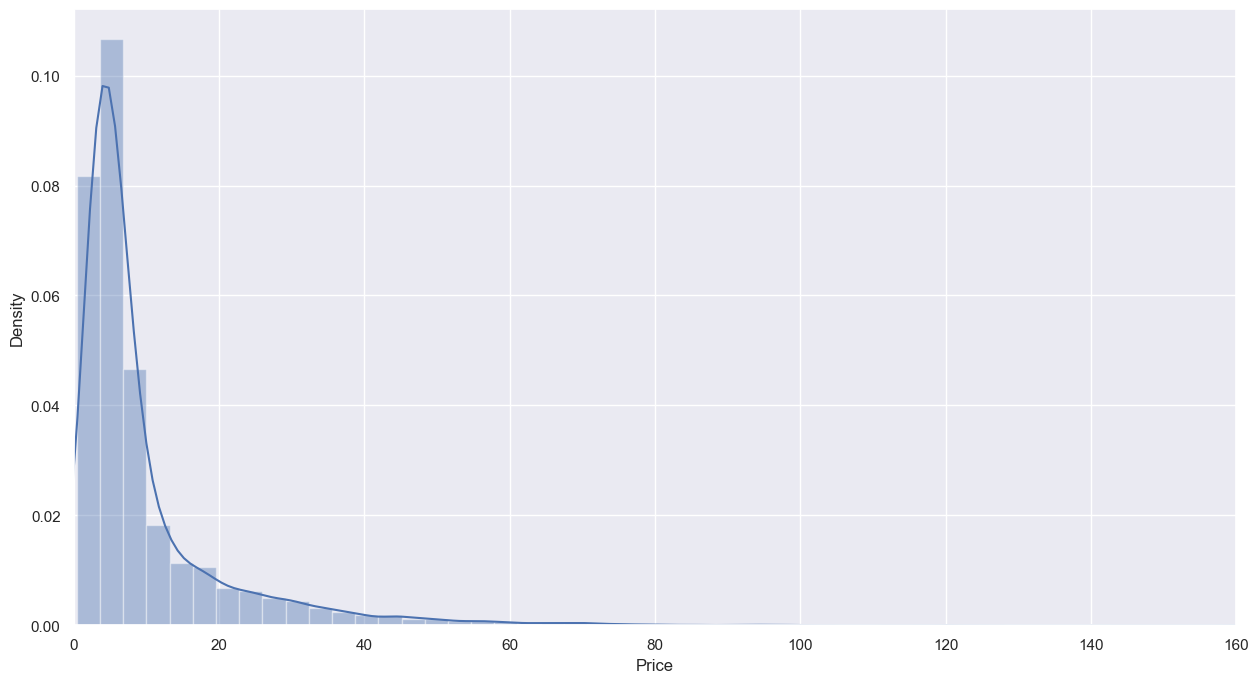

In [31]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['Price'])
plt.xlim([0,160])

### Fuel Type

In [32]:
df['Fuel_Type'].describe()

count       5872
unique         4
top       Diesel
freq        3152
Name: Fuel_Type, dtype: object

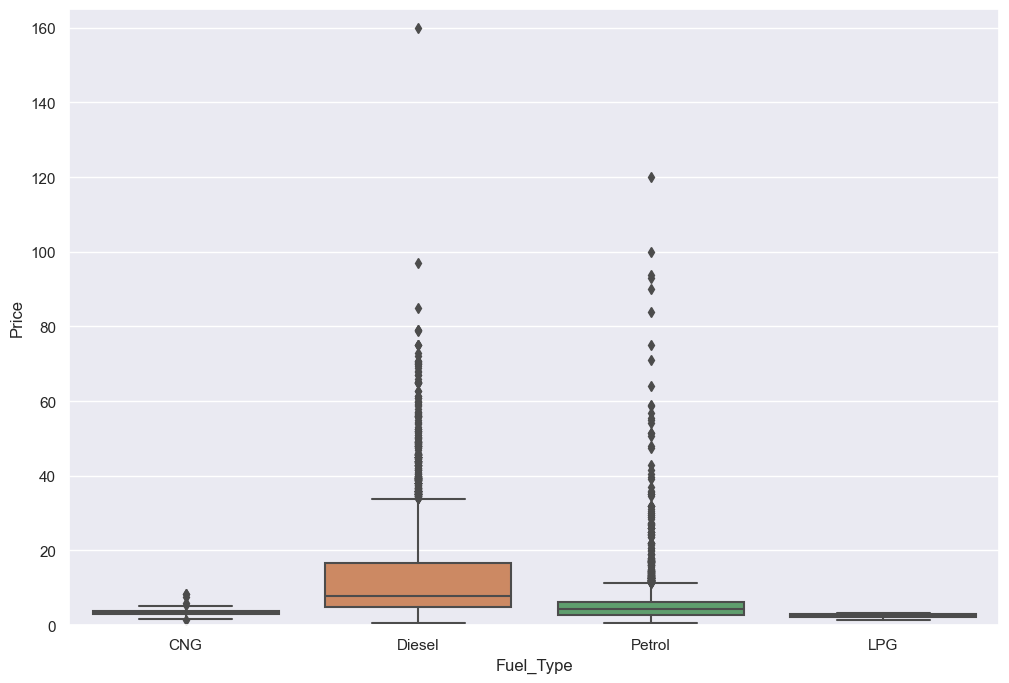

In [33]:
var = 'Fuel_Type'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);

As, we thought diseal car would cost followed Petrol.

### Year

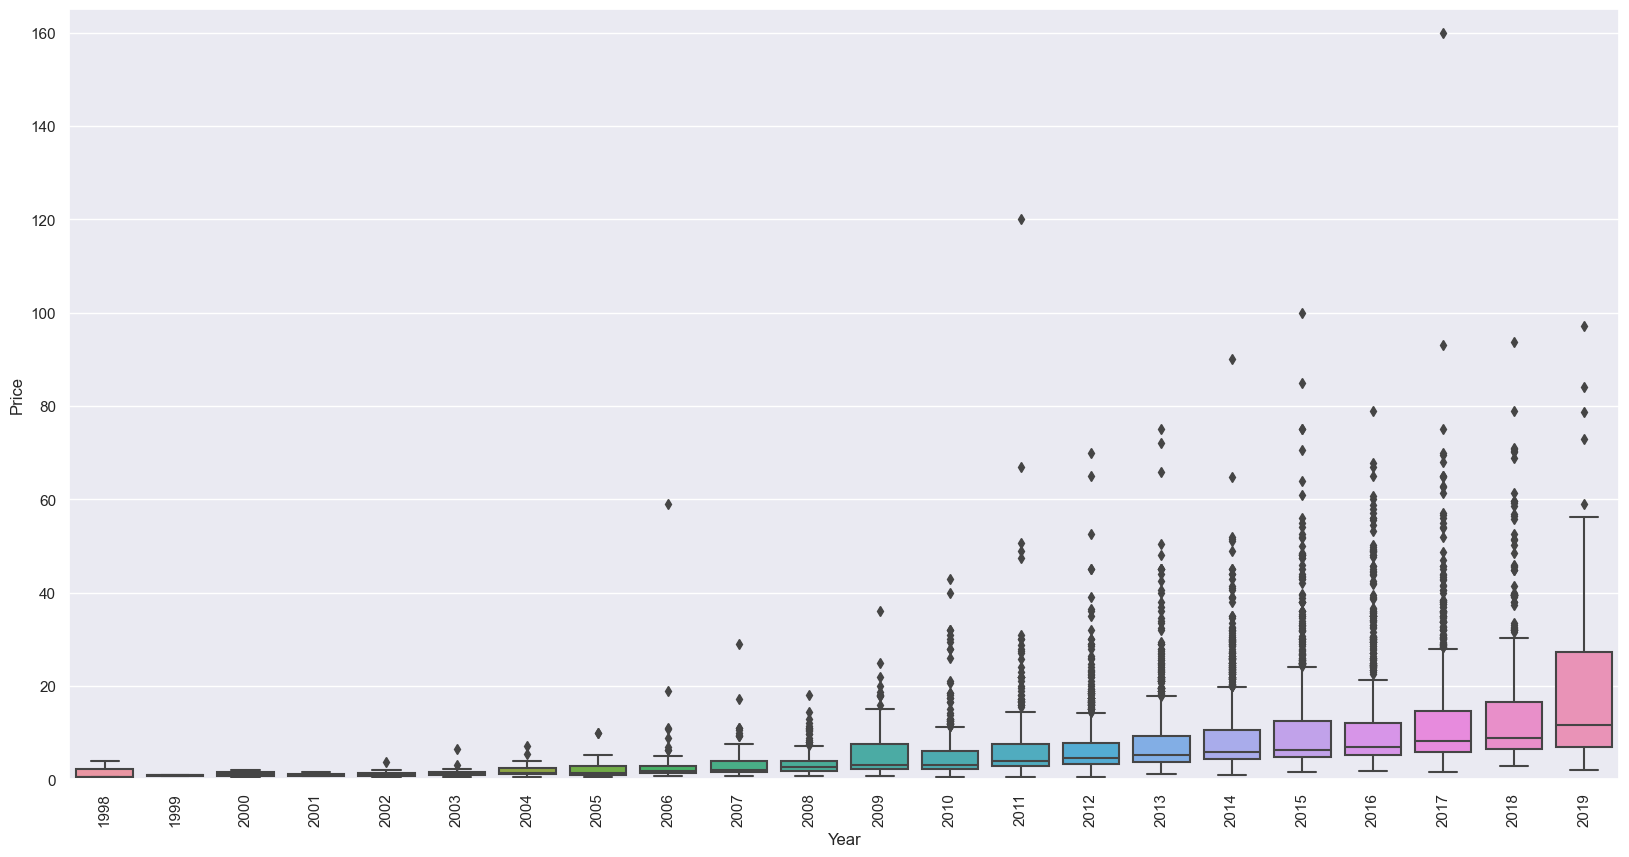

In [34]:
var = 'Year'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

Clearly, it's a strong tendency.

Price of Newest is high compared to old models.

### Owner Type

<Axes: xlabel='Owner_Type', ylabel='Price'>

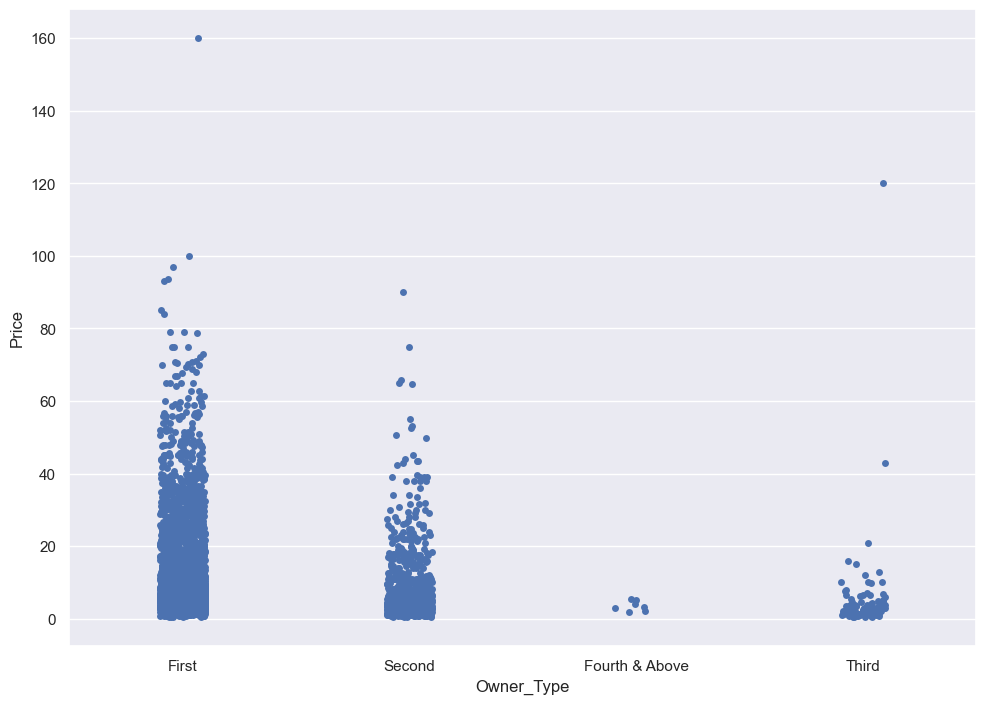

In [35]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = df) 

### Company

<Figure size 2000x1000 with 0 Axes>

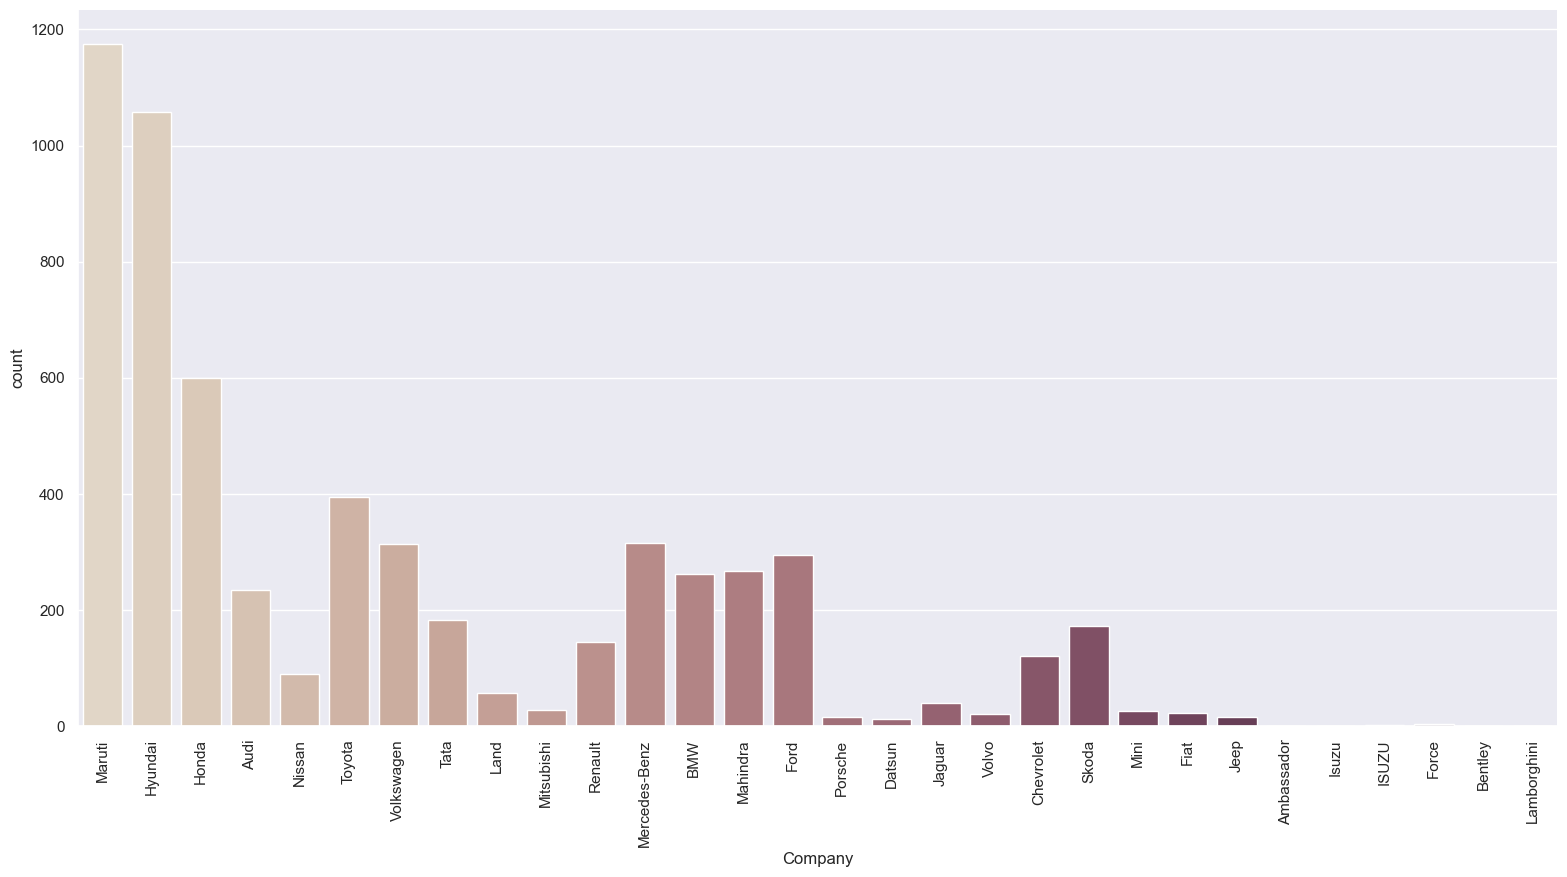

In [36]:
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df);
plt.xticks(rotation=90);

Cleary **Maruti** is most comman brand followed by **Hyundai**

# Working with Categorical Data

As for now we have left with only 5 categorical features:
1. Location
2. Fuel_Type
3. Transmission
4. Owner_Type
5. Company

For hadeling categorical data. We modtly use these 2 path:
1. OneHotEncoder
2. LabelEncoder

Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.

So, for each Features we will use plots to find out what to be used there.

### Working for Location

In [37]:
var = 'Location'
df[var].value_counts()

Location
Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: count, dtype: int64

From above values, we could judge that Mubmai has most number of cars to be sold followed by others.

<function matplotlib.pyplot.show(close=None, block=None)>

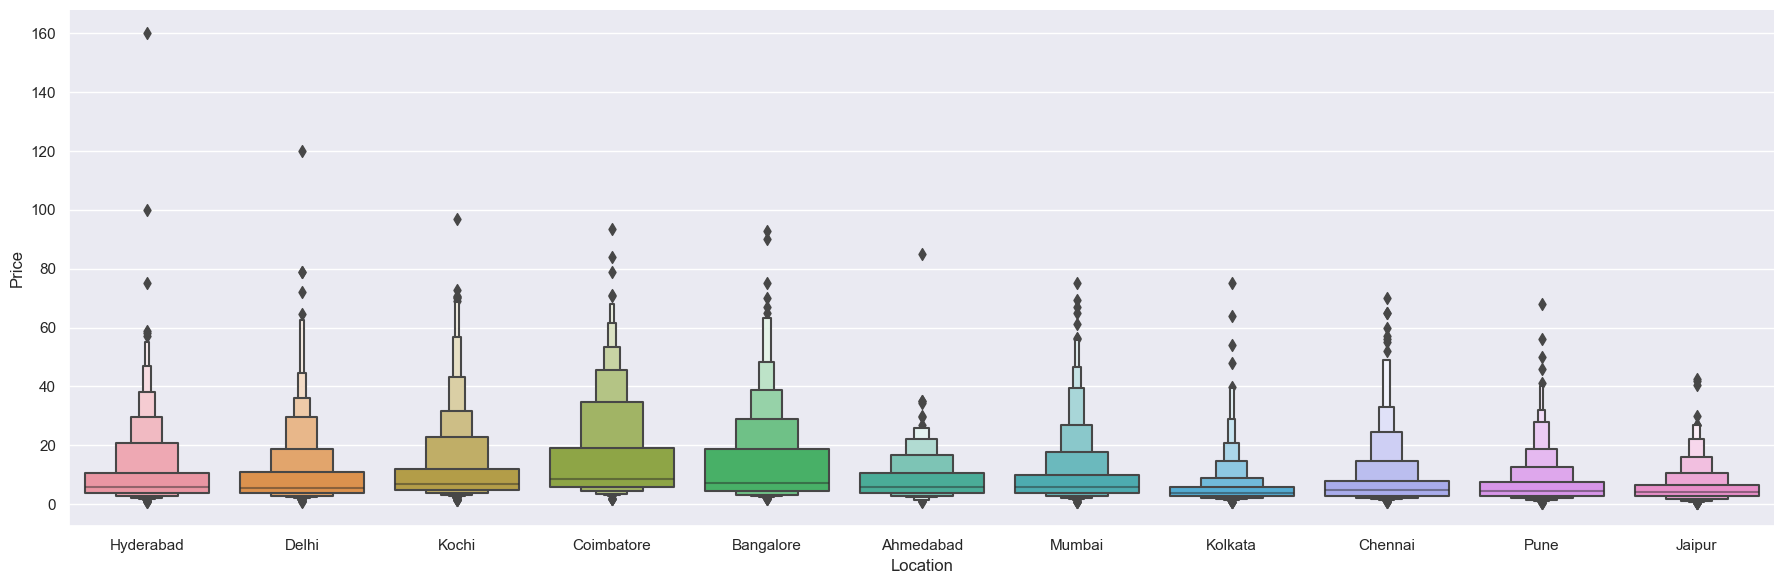

In [38]:
# Plot Location vs Price
sns.catplot(y='Price',x=var,data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

We will be using One-hot-encoding here

### Working for Fuel_Type

In [39]:
var = 'Fuel_Type'
df[var].value_counts()

Fuel_Type
Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

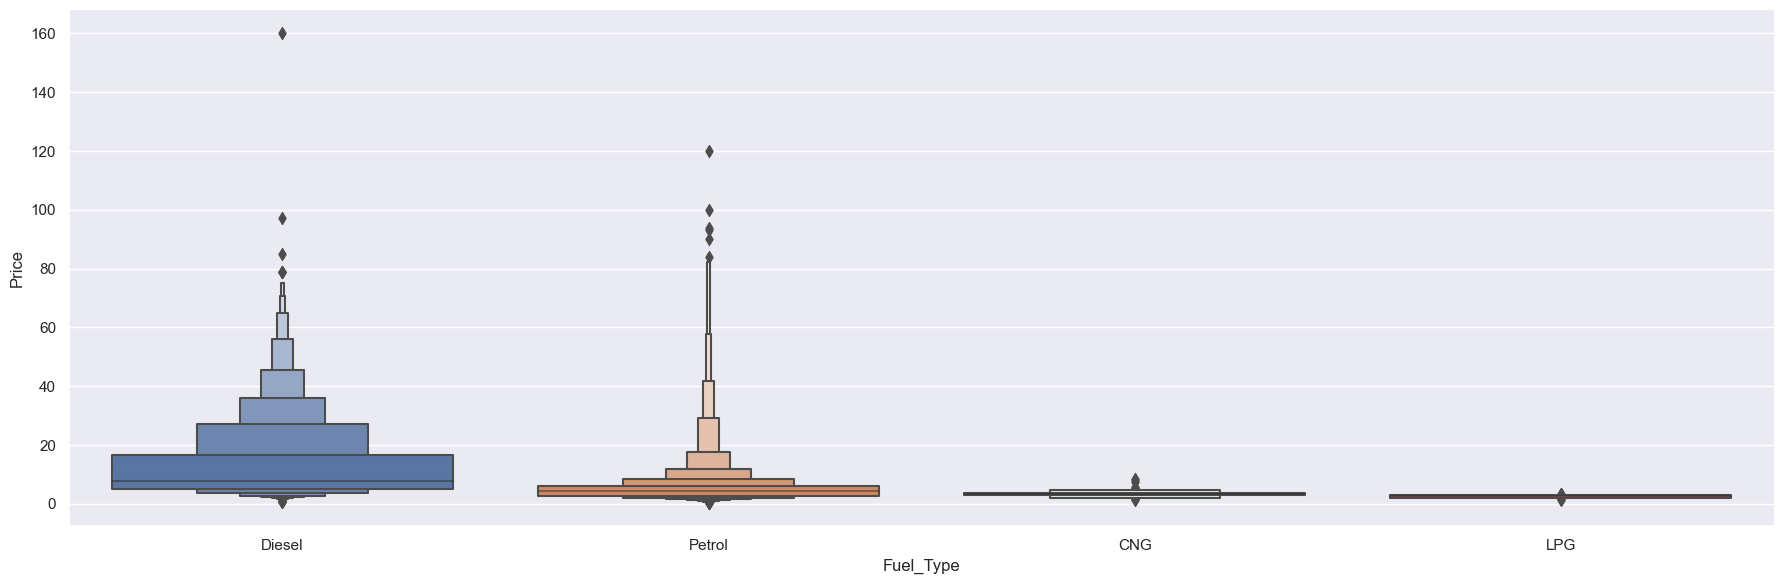

In [40]:
# Plot Fuel_Type vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Again we will be using One-hot-encoding

### Working with Transmission

In [41]:
var = 'Transmission'
df[var].value_counts()

Transmission
Manual       4170
Automatic    1702
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

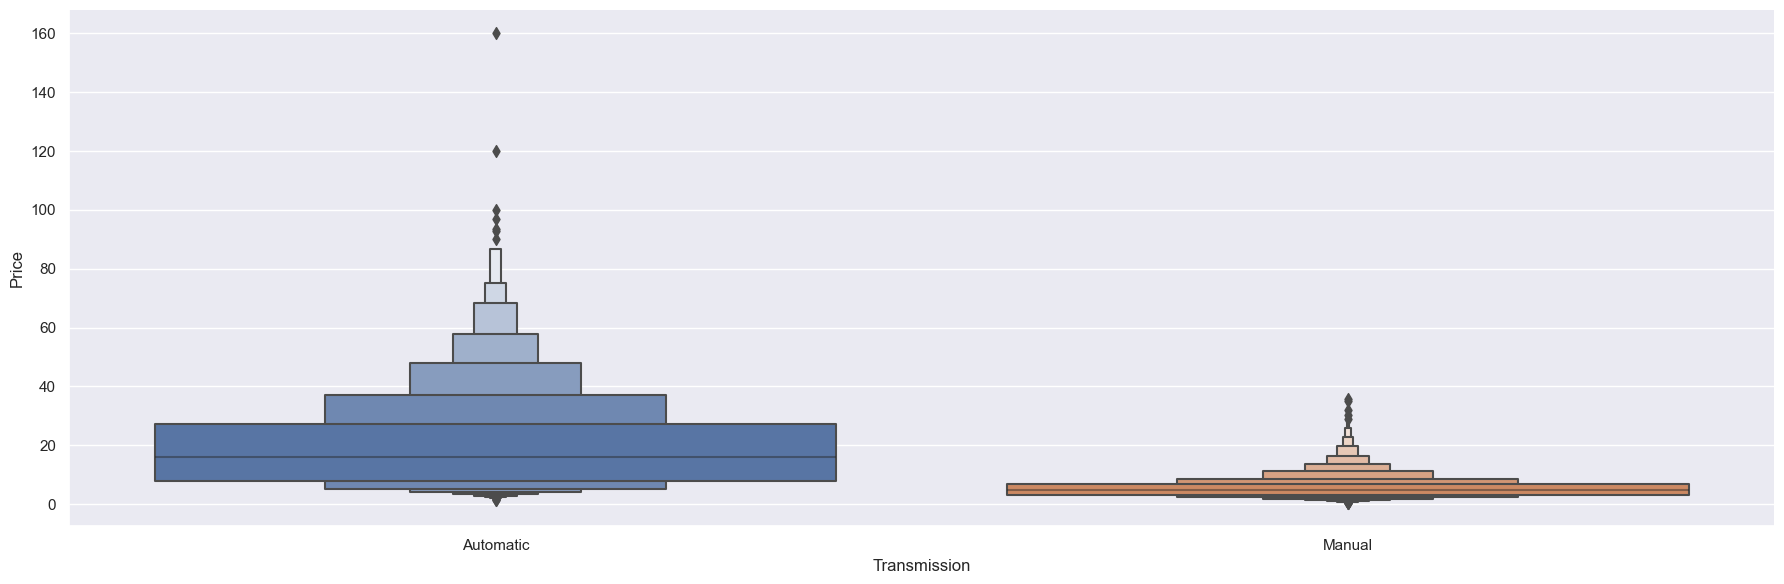

In [42]:
# Plot Transmission vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

No, order so One-hot-encoding

### Working with Owner_Type

In [43]:
var = 'Owner_Type'
df[var].value_counts()

Owner_Type
First             4839
Second             925
Third              101
Fourth & Above       7
Name: count, dtype: int64

As Owner_Type column has ordered data so we will be using **Label Encoding** 
**Finally**

In [44]:
df.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80


### Working with Company

In [45]:
var = 'Company'
df[var].value_counts()

Company
Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

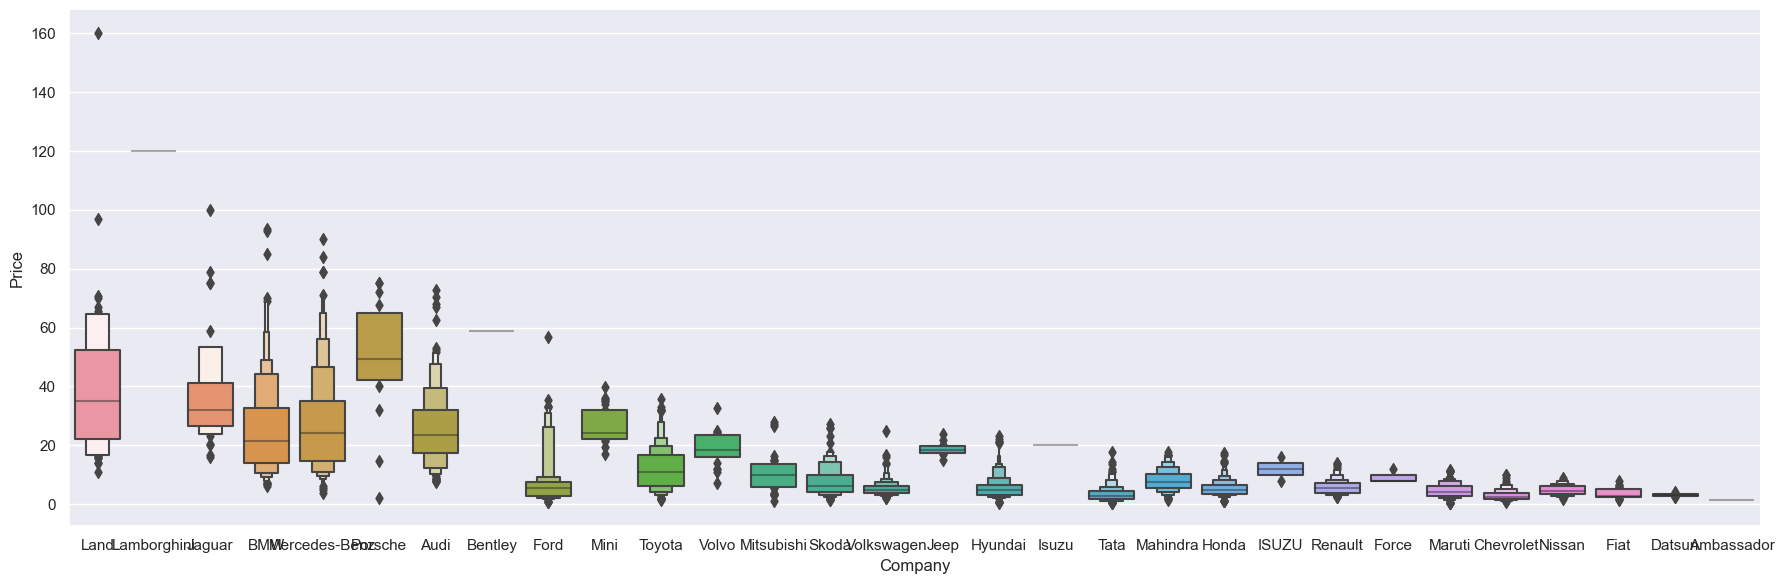

In [46]:
# Plot Company vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [47]:
df.shape

(5872, 12)

In [48]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Company', 'Mileage(km/kg)',
       'Engine(CC)', 'Power(bhp)'],
      dtype='object')

In [49]:
type(df['Year'][0])

numpy.int64

In [50]:
df.sort_values(['Year'],inplace=True)

In [51]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
5577,Jaipur,1998,95150,Petrol,Manual,3,5.0,0.53,Maruti,17.3,993.0,60.0
3055,Jaipur,1998,95150,Petrol,Manual,3,5.0,0.45,Maruti,17.3,993.0,60.0
3650,Mumbai,1998,55300,Diesel,Automatic,1,5.0,3.90,Mercedes-Benz,10.0,1796.0,157.7
1799,Pune,1999,140000,Petrol,Manual,1,5.0,0.90,Honda,13.0,1343.0,90.0
1191,Jaipur,1999,70000,Petrol,Manual,2,5.0,0.77,Maruti,17.3,993.0,60.0


In [52]:
df = df.reset_index()

In [53]:
df.drop(columns=['index'],inplace=True)

In [54]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Jaipur,1998,95150,Petrol,Manual,3,5.0,0.53,Maruti,17.3,993.0,60.0
1,Jaipur,1998,95150,Petrol,Manual,3,5.0,0.45,Maruti,17.3,993.0,60.0
2,Mumbai,1998,55300,Diesel,Automatic,1,5.0,3.90,Mercedes-Benz,10.0,1796.0,157.7
3,Pune,1999,140000,Petrol,Manual,1,5.0,0.90,Honda,13.0,1343.0,90.0
4,Jaipur,1999,70000,Petrol,Manual,2,5.0,0.77,Maruti,17.3,993.0,60.0


In [55]:
df.tail()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
5867,Kochi,2019,30529,Diesel,Manual,1,5.0,14.28,Hyundai,23.90,1582.0,126.20
5868,Hyderabad,2019,1000,Petrol,Manual,1,5.0,5.68,Volkswagen,18.78,999.0,75.00
5869,Ahmedabad,2019,4000,Diesel,Automatic,1,5.0,35.00,Mercedes-Benz,0.00,1950.0,194.00
5870,Coimbatore,2019,24950,Diesel,Manual,1,5.0,13.37,Renault,20.37,1461.0,108.45
5871,Coimbatore,2019,14648,Diesel,Manual,1,7.0,27.36,Ford,12.62,2198.0,158.00


In [56]:
ar1 = df['Year'].unique()

In [57]:
for val in ar1:
    res = df['Year'][df['Year'] == val].count()
    print(f"With Year {val} total number os sales = {res}")

With Year 1998 total number os sales = 3
With Year 1999 total number os sales = 2
With Year 2000 total number os sales = 4
With Year 2001 total number os sales = 4
With Year 2002 total number os sales = 11
With Year 2003 total number os sales = 14
With Year 2004 total number os sales = 25
With Year 2005 total number os sales = 42
With Year 2006 total number os sales = 66
With Year 2007 total number os sales = 105
With Year 2008 total number os sales = 162
With Year 2009 total number os sales = 191
With Year 2010 total number os sales = 333
With Year 2011 total number os sales = 452
With Year 2012 total number os sales = 562
With Year 2013 total number os sales = 639
With Year 2014 total number os sales = 794
With Year 2015 total number os sales = 740
With Year 2016 total number os sales = 737
With Year 2017 total number os sales = 586
With Year 2018 total number os sales = 298
With Year 2019 total number os sales = 102


In [58]:
df.shape

(5872, 12)

In [59]:
for i in df.select_dtypes('object').columns:
   le = LabelEncoder().fit(df[i])
   df[i] = le.transform(df[i])

In [60]:
train_size = int(len(df)*0.8)
train_dataset, test_dataset = df.iloc[:train_size],df.iloc[train_size:]

In [61]:
train_dataset.shape

(4697, 12)

In [62]:
test_dataset.shape

(1175, 12)

In [63]:
X_train = train_dataset.drop('Price', axis = 1)
y_train = train_dataset.loc[:,['Price']]

In [64]:
X_test = test_dataset.drop('Price', axis = 1)
y_test = test_dataset.loc[:,['Price']]

In [65]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4697, 11)
(4697, 1)
(1175, 11)
(1175, 1)


In [66]:
train_X = X_train
train_y = y_train
test_X = X_test
test_y = y_test

In [67]:
# Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)
# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)
# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test) 

In [68]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)
TIME_STEPS = 30
X_test, y_test = create_dataset(test_x_norm, test_y_norm,   
                                TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm, 
                                  TIME_STEPS)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (4667, 30, 11)
y_train.shape:  (4667, 1)
X_test.shape:  (1145, 30, 11)
y_test.shape:  (1145, 1)


In [69]:
X_train.shape[2]

11

In [70]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,                             
              return_sequences=True),
              input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    model.add(m (units = 30, return_sequences = True,
                input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
# BiLSTM
model_bilstm = create_model_bilstm(64)
# GRU and LSTM
model_gru = create_model(170, GRU)
model_lstm = create_model(170, LSTM)

In [71]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2, batch_size = 32, 
                        shuffle = False, callbacks = [early_stop])
    return history
history_bilstm = fit_model(model_bilstm)
print("bilstm model trained")

history_lstm = fit_model(model_lstm)
print("lstm model trained")
history_gru = fit_model(model_gru)
print("gru model trained")

Epoch 1/100
117/117 [==============================] - 12s 42ms/step - loss: 0.0065 - val_loss: 0.0115
Epoch 2/100
117/117 [==============================] - 3s 29ms/step - loss: 0.0052 - val_loss: 0.0115
Epoch 3/100
117/117 [==============================] - 4s 32ms/step - loss: 0.0052 - val_loss: 0.0115
Epoch 4/100
117/117 [==============================] - 4s 31ms/step - loss: 0.0051 - val_loss: 0.0116
Epoch 5/100
117/117 [==============================] - 4s 32ms/step - loss: 0.0051 - val_loss: 0.0116
Epoch 6/100
117/117 [==============================] - 4s 32ms/step - loss: 0.0050 - val_loss: 0.0116
Epoch 7/100
117/117 [==============================] - 4s 34ms/step - loss: 0.0050 - val_loss: 0.0116
Epoch 8/100
117/117 [==============================] - 4s 32ms/step - loss: 0.0050 - val_loss: 0.0116
Epoch 9/100
117/117 [==============================] - 4s 33ms/step - loss: 0.0050 - val_loss: 0.0115
Epoch 10/100
117/117 [==============================] - 4s 35ms/step - loss: 0.00

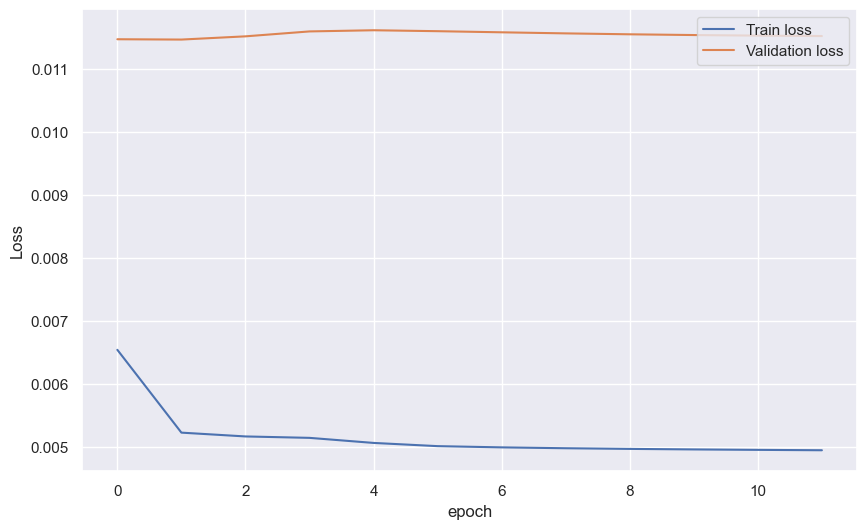

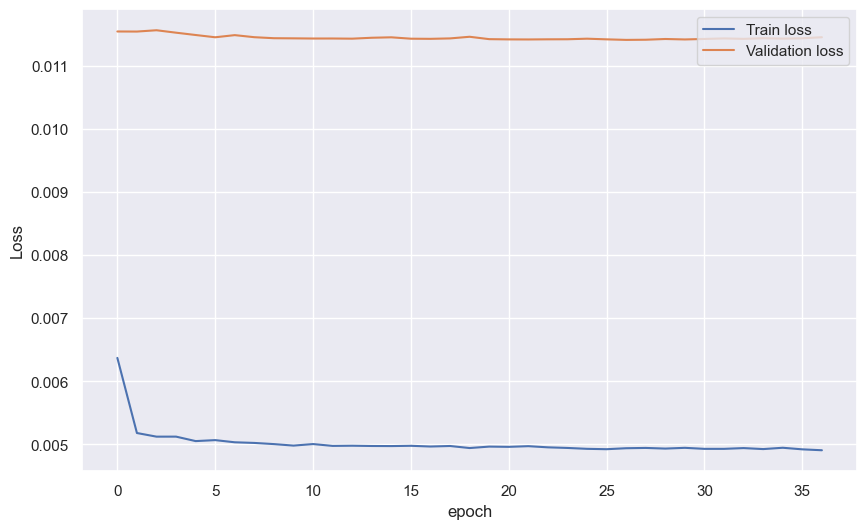

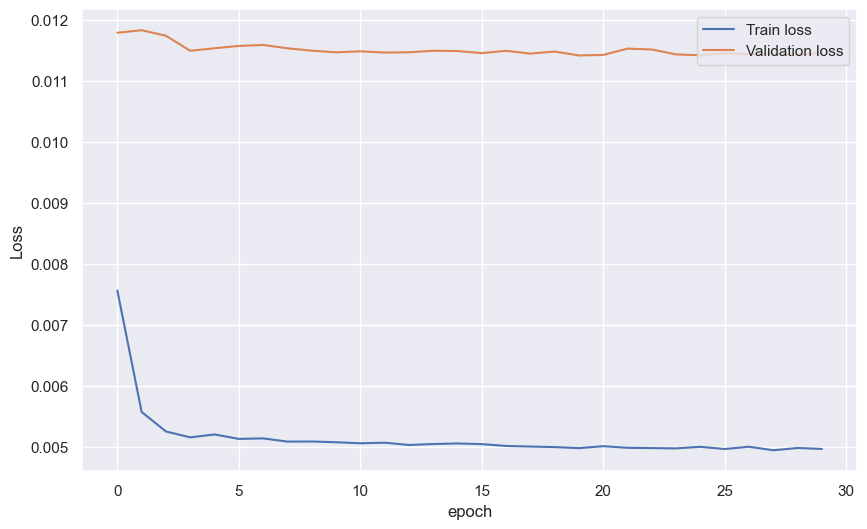

In [72]:
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
plot_loss (history_bilstm)
plot_loss (history_lstm)
plot_loss (history_gru)

In [73]:
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

In [74]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction
prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)

36/36 [==============================] - 1s 9ms/step


In [75]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    act_sum = np.sum(actual)
    pred_sum = np.sum(predictions)
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('Accuracy : {:.4f}'.format((pred_sum/act_sum)*100))
    print('')
evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')
evaluate_prediction(prediction_lstm, y_test, 'LSTM')
evaluate_prediction(prediction_gru, y_test, 'GRU')

Bidirectional LSTM:
Mean Absolute Error: 9.2151
Root Mean Square Error: 15.2489
Accuracy : 82.5176

LSTM:
Mean Absolute Error: 9.6893
Root Mean Square Error: 15.1074
Accuracy : 90.4318

GRU:
Mean Absolute Error: 9.3319
Root Mean Square Error: 15.1703
Accuracy : 84.6433



In [76]:
type(prediction_bilstm)

numpy.ndarray

In [77]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(4697, 11)
(4697, 1)
(1175, 11)
(1175, 1)


# Testing Different Models

## Linear Regression

In [78]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [79]:
Linear_reg_model = LinearRegression()

In [80]:
Linear_reg_model.fit(train_X, train_y)

LinearRegression()

In [81]:
pred_y = Linear_reg_model.predict(test_X)

In [82]:
print(Linear_reg_model.score(test_X, test_y))

0.5264803779176181


In [83]:
evaluate_prediction(pred_y, test_y.to_numpy(), 'Linear Regression')

Linear Regression:
Mean Absolute Error: 4.5241
Root Mean Square Error: 10.3145
Accuracy : 86.9393



## SVR (Support Vector For Regression)

In [84]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(train_X, train_y)

C:\Users\vedpr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [85]:
pred_y = regressor.predict(test_X)

In [86]:
from sklearn.metrics import r2_score
score = r2_score(test_y, pred_y)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is -32.0%


In [87]:
evaluate_prediction(pred_y, test_y.to_numpy(), 'SVM')

SVM:
Mean Absolute Error: 9.3323
Root Mean Square Error: 17.3929
Accuracy : 38.0363



## Using Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(train_X,train_y)

DecisionTreeRegressor()

In [89]:
pred_y = regressor.predict(test_X)

In [90]:
from sklearn.metrics import r2_score
score = r2_score(test_y, pred_y)


In [91]:
evaluate_prediction(pred_y, test_y.to_numpy(), 'Decision Tree')

Decision Tree:
Mean Absolute Error: 12.2400
Root Mean Square Error: 19.2879
Accuracy : 87.4793

